# Аналитика в авиакомпании

Имеются файлы, в которых содержатся результаты запросов из предыдущих заданий о модели самолета и количестве рейсов для каждой модели самолетов в сентябре 2018 года, а также о городах и среднем количестве рейсов, прибывающих в город за день в августе 2018 года. Основная задача - изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Изучение данных из файла

В первую очередь изучим общую информацию об имеющихся наборах данных для того, чтобы реализовать дальнейшие шаги по предобработке данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

flights = pd.read_csv('/datasets/query_1.csv')
flights_cities = pd.read_csv('/datasets/query_3.csv')
for data in [flights, flights_cities]: print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


In [2]:
flights.head(5)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [3]:
flights_cities.head(5)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


### Вывод

Как можно увидеть из полученной информации, имеющийся набор данных не содержит пропущенных значений.Типы данных в большинстве своем распознаны правильно, только колонка average_flights требует преобразований, о которых будет сказано ниже.

## Предобработка данных

Соответственно, изменим тип данных столбца, содержащего информацию о среднем количестве рейсов, прибывающих в город city за день в августе 2018 г., с вещественного на целочисленный тип данных.

In [4]:
flights_cities['average_flights'] = flights_cities['average_flights'].astype('int')
flights_cities.head(5)

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


### Вывод

Предобаботка прошла успешна, датасет подготовлен для дальнейшего анализа.

## Построение и анализ графиков

В качестве дальнейших шагов предпримем определение ситуации в аивакомпании: изучим, как распределяются рейсы по городам и моделям самолетов, с помощью средств визуализации.

In [5]:
top_10 = flights_cities.sort_values(by = 'average_flights', ascending = False)
top_10.head(10)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


Как можно увидеть из полученной таблицы, с большим отрывом лидером по количеству рейсов среди городов предсказуемо становится Москва. Также в топ-3 городов входят Санкт-Петербург и Новосибирск, топ-5 замыкают Екатеринбург и Красноярск.

Построим гистограмму, отображающую распределение количества рейсов по моделям самолетов. 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

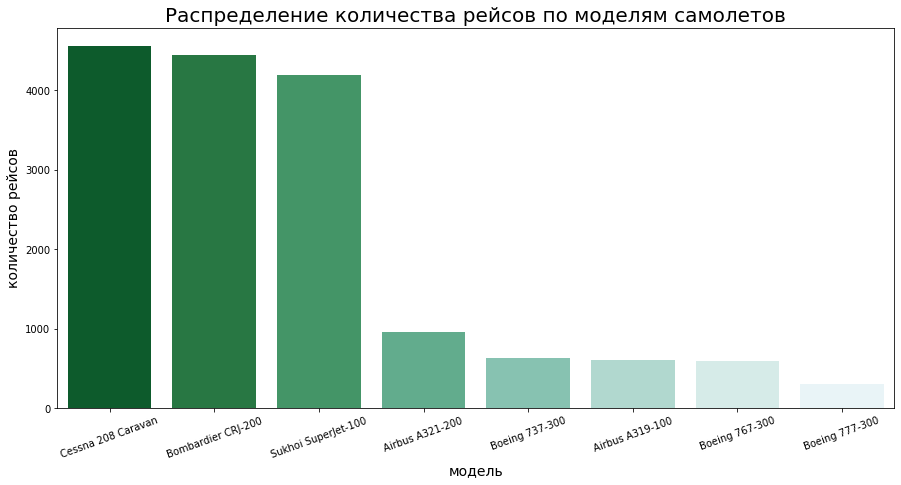

In [6]:
models_flights = flights.sort_values(by ='flights_amount', ascending = False)
plt.figure(figsize=(15, 7))
plt.title('Распределение количества рейсов по моделям самолетов', fontsize=20)
sns.barplot(x = "model", y = "flights_amount", data = models_flights, palette = "BuGn_r")
plt.xlabel('модель', fontsize=14)
plt.ylabel('количество рейсов', fontsize=14)
plt.xticks(rotation=20)

Как можно увидеть из графика, лидеры по количеству совершенных рейсов - Cessna 208 Grand Caravan, Bombardier CRJ-200 и Sukhoi Superjet 100. Лидер - Cessna 208 Grand Caravan - небольшой самолет, рассчитанный на перевозку 9 пассажиров и приспособленный для работы в сложных условиях, особенно популярен в северных районах Канады и Аляски (организация арктических туров и услуги воздушного такси пр.), Bombardier CRJ-200 - это также небольшой самолет (50-местный), который хорошо подходит для рейсов на средние расстояния, а Sukhoi Superjet 100 (рассчитан на 100 человек) преимущественно используется для небольших рейсов внутри России, также на нем летают до Армении и Киргизии. Наименее популярная модель - Boeing 777-300, более вместительный самолет (от 300 до 500 чел.) и дальне магистральный.

Text(0.5, 0, 'кол-во рейсов')

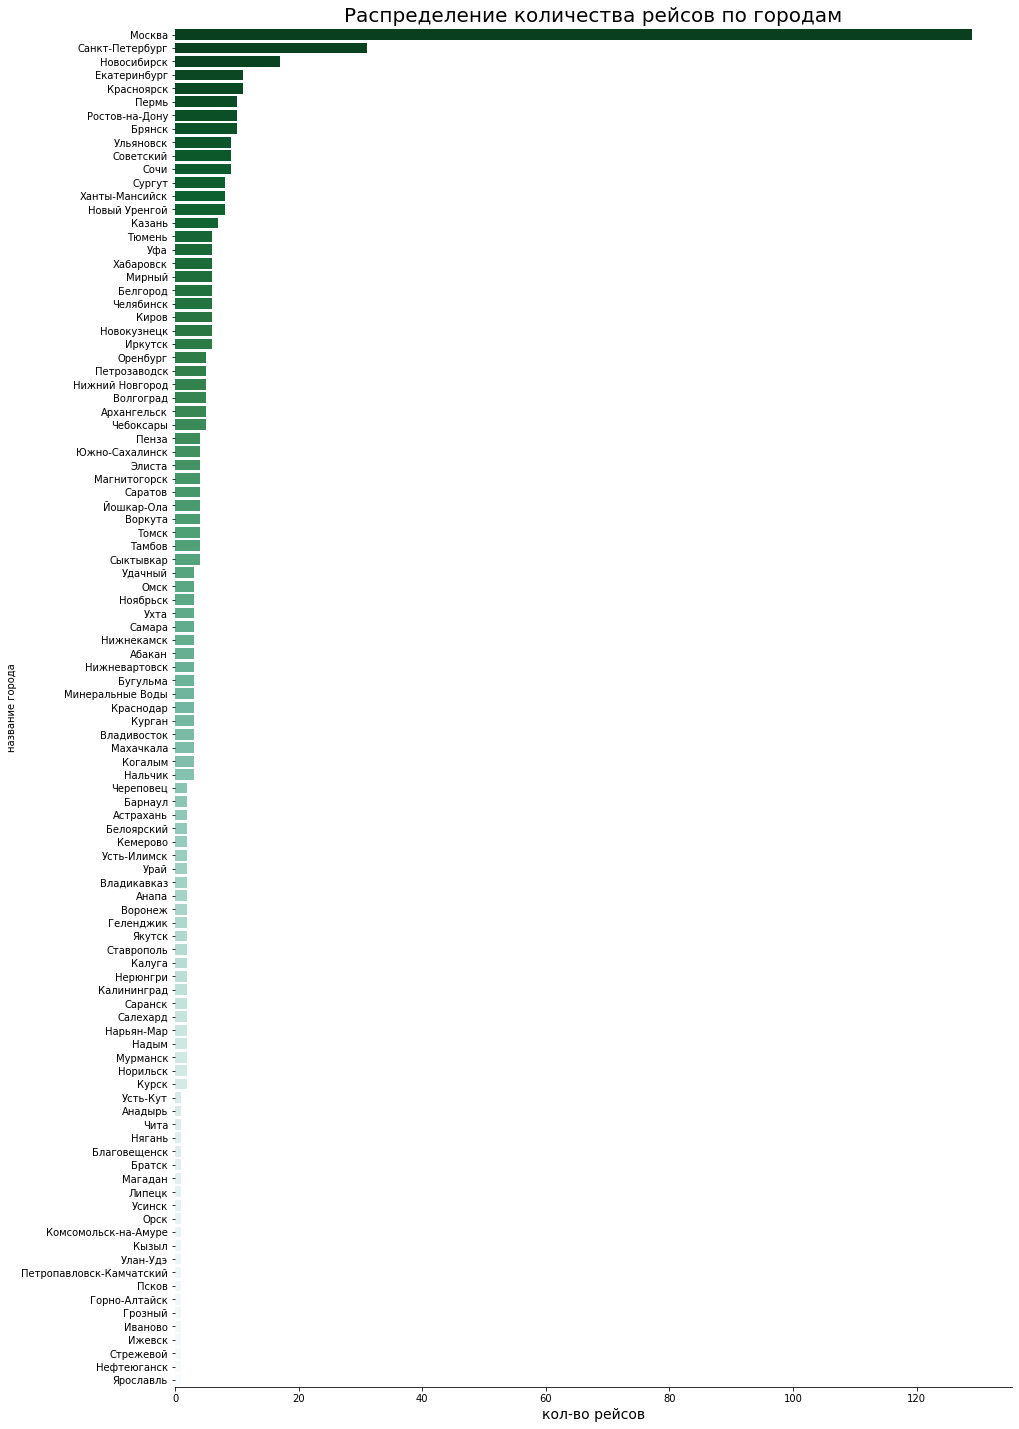

In [7]:
plt.figure(figsize=(15, 25))
plt.title('Распределение количества рейсов по городам', fontsize=20)
sns.barplot(x='average_flights', y='city', data=top_10, palette = "BuGn_r")
sns.despine(left=True)
plt.ylabel('название города')
plt.xlabel('кол-во рейсов', fontsize=14)

Анализируя распределение рейсов по городам, можно заметить, что предсказуемо большее количество рейсов летит в более крупные города (лидеры рейтинга - Москва, Санкт-Петербург и Новосибирск), наименьшее количество рейсов приходится на Стержневой, Нефтеюганск (небольшие города, кол-во рейсов связано именно с этим) и Ярославль (находится недалеко от Москвы, до него проще добраться на других видах транспорта).

Text(0.5, 0, 'кол-во рейсов')

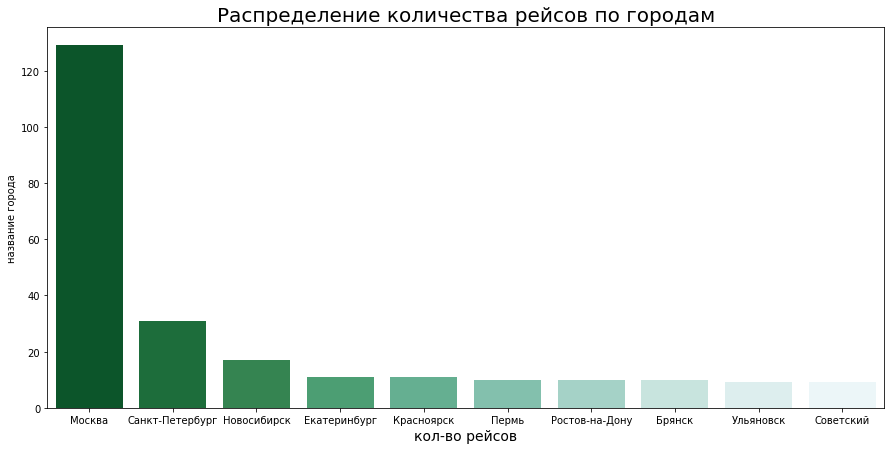

In [8]:
plt.figure(figsize=(15, 7))
plt.title('Распределение количества рейсов по городам', fontsize=20)
sns.barplot(x='city', y='average_flights', data=top_10.head(10), palette = "BuGn_r")
plt.ylabel('название города')
plt.xlabel('кол-во рейсов', fontsize=14)

Среди топ-10 городов лидерами выступают Москва, Санкт-Петербург и Новосибирск, замыкают рейтинг Брянск, Ульяновск и Советский.

## Общий вывод

Таким образом, по итогам анализа можно сделать следующие выводы:
во-первых, наиболее эксплуатируемые модели самолетов -  Cessna 208 Grand Caravan, Bombardier CRJ-200 и Sukhoi Superjet 100, как правило, небольшие и и не летают на дальние расстояния. Такие самолеты мобильны, удобны и оптимальны по стоимости, что также добавляет им популярности;
во-вторых, среди городов-лидеров по количеству рейсов становятся наиболее крупные мегаполисы - Москва, Санкт-Петербург и Новосибирск как основные центры экономической, культурной и туристической жизни.